PART 1

# **Support Vector Machines (Classification)**


In [111]:
#Classification
from sklearn import svm
X = [[0, 0], [1, 1]]
y = [0, 1]
clf = svm.SVC()
clf.fit(X, y)

SVC()

In [112]:
clf.predict([[2., 2.]])

array([1])

In [5]:
# get support vectors
clf.support_vectors_

array([[0., 0.],
       [1., 1.]])

In [6]:
# get indices of support vectors
clf.support_



array([0, 1], dtype=int32)

In [7]:
# get number of support vectors for each class
clf.n_support_

array([1, 1], dtype=int32)

In [8]:
#Multi-class classification
X = [[0], [1], [2], [3]]
Y = [0, 1, 2, 3]
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X, Y)

SVC(decision_function_shape='ovo')

In [9]:
dec = clf.decision_function([[1]])
dec.shape[1] # 6 classes: 4*3/2 = 6

6

In [10]:
clf.decision_function_shape = "ovr"
dec = clf.decision_function([[1]])
dec.shape[1] # 4 classes

4

In [11]:
#Regression
from sklearn import svm
X = [[0, 0], [2, 2]]
y = [0.5, 2.5]
regr = svm.SVR()
regr.fit(X, y)

SVR()

In [12]:
regr.predict([[1, 1]])

array([1.5])

In [13]:
#Tips on Practical Use
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC())

In [14]:
#Kernel Functions
linear_svc = svm.SVC(kernel='linear')
linear_svc.kernel

'linear'

In [15]:
rbf_svc = svm.SVC(kernel='rbf')
rbf_svc.kernel

'rbf'

# **Decision Tree Regression**


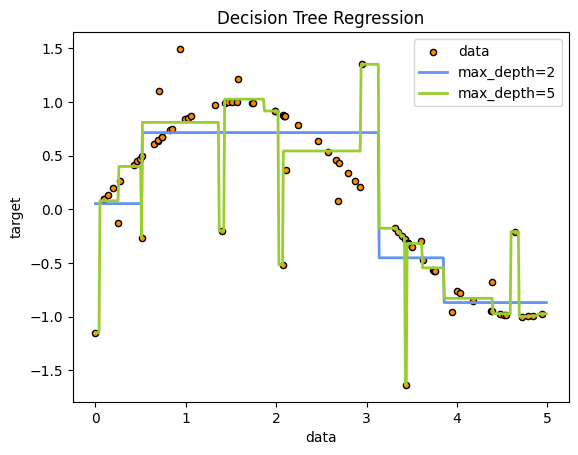

In [16]:
# Import the necessary modules and libraries
import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import DecisionTreeRegressor

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

# **Kernel PCA**

In [17]:
#Project data: PCA vs Kernel PCA
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

X, y = make_circles(n_samples=1_000, factor=0.3, noise=0.05, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

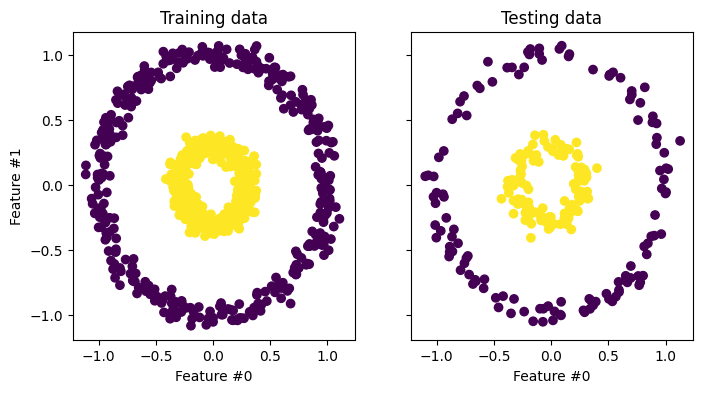

In [18]:
import matplotlib.pyplot as plt

_, (train_ax, test_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4))

train_ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
train_ax.set_ylabel("Feature #1")
train_ax.set_xlabel("Feature #0")
train_ax.set_title("Training data")

test_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
test_ax.set_xlabel("Feature #0")
_ = test_ax.set_title("Testing data")

In [19]:
from sklearn.decomposition import PCA, KernelPCA

pca = PCA(n_components=2)
kernel_pca = KernelPCA(
    n_components=None, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1
)

X_test_pca = pca.fit(X_train).transform(X_test)
X_test_kernel_pca = kernel_pca.fit(X_train).transform(X_test)

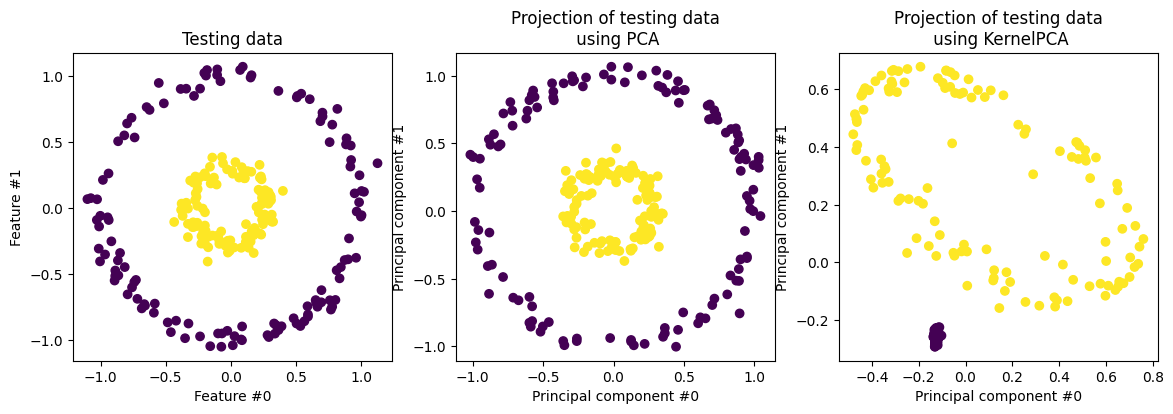

In [20]:
fig, (orig_data_ax, pca_proj_ax, kernel_pca_proj_ax) = plt.subplots(
    ncols=3, figsize=(14, 4)
)

orig_data_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
orig_data_ax.set_ylabel("Feature #1")
orig_data_ax.set_xlabel("Feature #0")
orig_data_ax.set_title("Testing data")

pca_proj_ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test)
pca_proj_ax.set_ylabel("Principal component #1")
pca_proj_ax.set_xlabel("Principal component #0")
pca_proj_ax.set_title("Projection of testing data\n using PCA")

kernel_pca_proj_ax.scatter(X_test_kernel_pca[:, 0], X_test_kernel_pca[:, 1], c=y_test)
kernel_pca_proj_ax.set_ylabel("Principal component #1")
kernel_pca_proj_ax.set_xlabel("Principal component #0")
_ = kernel_pca_proj_ax.set_title("Projection of testing data\n using KernelPCA")

In [21]:
#Projecting into the original feature space
X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kernel_pca = kernel_pca.inverse_transform(kernel_pca.transform(X_test))

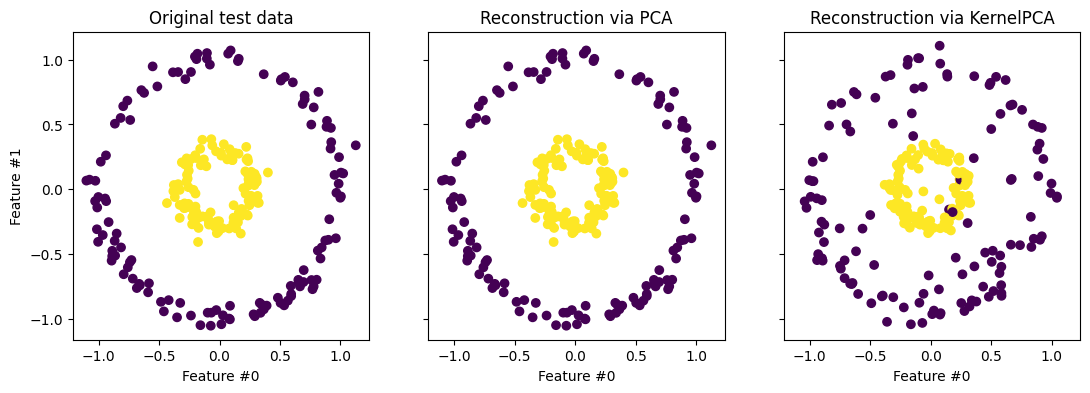

In [22]:
fig, (orig_data_ax, pca_back_proj_ax, kernel_pca_back_proj_ax) = plt.subplots(
    ncols=3, sharex=True, sharey=True, figsize=(13, 4)
)

orig_data_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
orig_data_ax.set_ylabel("Feature #1")
orig_data_ax.set_xlabel("Feature #0")
orig_data_ax.set_title("Original test data")

pca_back_proj_ax.scatter(X_reconstructed_pca[:, 0], X_reconstructed_pca[:, 1], c=y_test)
pca_back_proj_ax.set_xlabel("Feature #0")
pca_back_proj_ax.set_title("Reconstruction via PCA")

kernel_pca_back_proj_ax.scatter(
    X_reconstructed_kernel_pca[:, 0], X_reconstructed_kernel_pca[:, 1], c=y_test
)
kernel_pca_back_proj_ax.set_xlabel("Feature #0")
_ = kernel_pca_back_proj_ax.set_title("Reconstruction via KernelPCA")

# **cross_val_score** and **GridSearchCV**

In [23]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import make_hastie_10_2
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [24]:
#Running GridSearchCV
X, y = make_hastie_10_2(n_samples=8000, random_state=42)

# The scorers can be either one of the predefined metric strings or a scorer
# callable, like the one returned by make_scorer
scoring = {"AUC": "roc_auc", "Accuracy": make_scorer(accuracy_score)}

# Setting refit='AUC', refits an estimator on the whole dataset with the
# parameter setting that has the best cross-validated AUC score.
# That estimator is made available at ``gs.best_estimator_`` along with
# parameters like ``gs.best_score_``, ``gs.best_params_`` and
# ``gs.best_index_``
gs = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid={"min_samples_split": range(2, 403, 20)},
    scoring=scoring,
    refit="AUC",
    n_jobs=2,
    return_train_score=True,
)
gs.fit(X, y)
results = gs.cv_results_

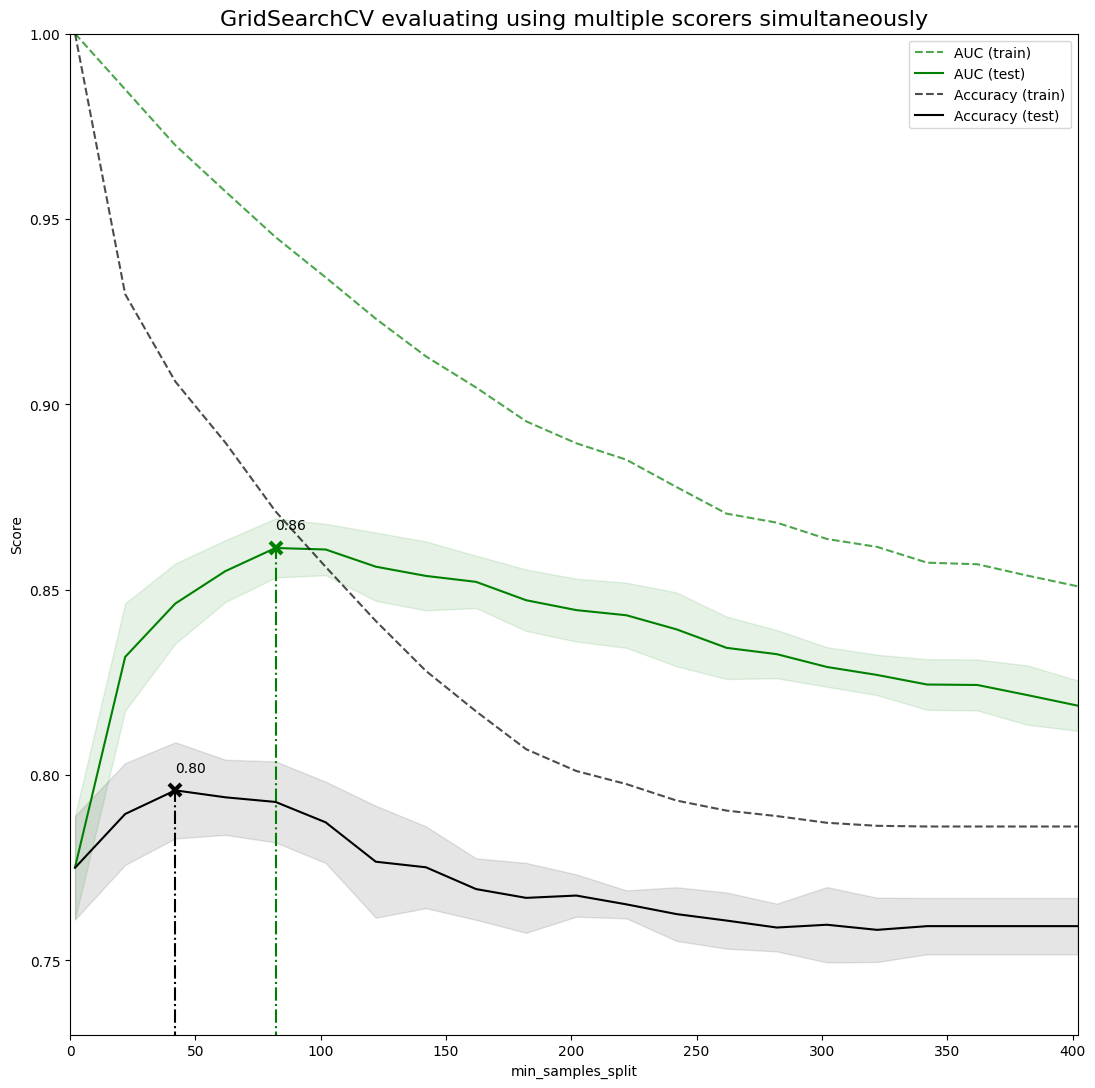

In [25]:
#Plotting the result
plt.figure(figsize=(13, 13))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously", fontsize=16)

plt.xlabel("min_samples_split")
plt.ylabel("Score")

ax = plt.gca()
ax.set_xlim(0, 402)
ax.set_ylim(0.73, 1)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results["param_min_samples_split"].data, dtype=float)

for scorer, color in zip(sorted(scoring), ["g", "k"]):
    for sample, style in (("train", "--"), ("test", "-")):
        sample_score_mean = results["mean_%s_%s" % (sample, scorer)]
        sample_score_std = results["std_%s_%s" % (sample, scorer)]
        ax.fill_between(
            X_axis,
            sample_score_mean - sample_score_std,
            sample_score_mean + sample_score_std,
            alpha=0.1 if sample == "test" else 0,
            color=color,
        )
        ax.plot(
            X_axis,
            sample_score_mean,
            style,
            color=color,
            alpha=1 if sample == "test" else 0.7,
            label="%s (%s)" % (scorer, sample),
        )

    best_index = np.nonzero(results["rank_test_%s" % scorer] == 1)[0][0]
    best_score = results["mean_test_%s" % scorer][best_index]

    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot(
        [
            X_axis[best_index],
        ]
        * 2,
        [0, best_score],
        linestyle="-.",
        color=color,
        marker="x",
        markeredgewidth=3,
        ms=8,
    )

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score, (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid(False)
plt.show()

# **Preprocessing data**

In [17]:
#Standardization, or mean removal and variance scaling
from sklearn import preprocessing
import numpy as np
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])
scaler = preprocessing.StandardScaler().fit(X_train)
scaler

StandardScaler()

In [18]:
scaler.mean_

array([1.        , 0.        , 0.33333333])

In [19]:
scaler.scale_

array([0.81649658, 0.81649658, 1.24721913])

In [20]:
X_scaled = scaler.transform(X_train)
X_scaled

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [21]:
X_scaled.mean(axis=0)

array([0., 0., 0.])

In [22]:
X_scaled.std(axis=0)

array([1., 1., 1.])

In [23]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X, y = make_classification(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [24]:
pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.

0.96

In [25]:
#Scaling features to a range
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])

min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_train_minmax

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

In [26]:
X_test = np.array([[-3., -1.,  4.]])
X_test_minmax = min_max_scaler.transform(X_test)
X_test_minmax

array([[-1.5       ,  0.        ,  1.66666667]])

In [27]:
min_max_scaler.scale_

array([0.5       , 0.5       , 0.33333333])

In [28]:
min_max_scaler.min_

array([0.        , 0.5       , 0.33333333])

In [29]:
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])

max_abs_scaler = preprocessing.MaxAbsScaler()
X_train_maxabs = max_abs_scaler.fit_transform(X_train)
X_train_maxabs

array([[ 0.5, -1. ,  1. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. , -0.5]])

In [30]:
X_test = np.array([[ -3., -1.,  4.]])
X_test_maxabs = max_abs_scaler.transform(X_test)
X_test_maxabs

array([[-1.5, -1. ,  2. ]])

In [31]:
max_abs_scaler.scale_

array([2., 1., 2.])

In [32]:
#Mapping to a Uniform Distribution
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
quantile_transformer = preprocessing.QuantileTransformer(random_state=0)
X_train_trans = quantile_transformer.fit_transform(X_train)
X_test_trans = quantile_transformer.transform(X_test)
np.percentile(X_train[:, 0], [0, 25, 50, 75, 100])


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (112). n_quantiles is set to n_samples.
  warnings.warn(


array([4.3, 5.1, 5.8, 6.5, 7.9])

In [33]:
np.percentile(X_train_trans[:, 0], [0, 25, 50, 75, 100])

array([0.        , 0.23873874, 0.50900901, 0.74324324, 1.        ])

In [34]:
np.percentile(X_test[:, 0], [0, 25, 50, 75, 100])

array([4.4  , 5.125, 5.75 , 6.175, 7.3  ])

In [35]:
np.percentile(X_test_trans[:, 0], [0, 25, 50, 75, 100])

array([0.01351351, 0.25      , 0.47747748, 0.60472973, 0.94144144])

In [36]:
#Mapping to a Gaussian distribution
quantile_transformer = preprocessing.QuantileTransformer(
    output_distribution='normal', random_state=0)
X_trans = quantile_transformer.fit_transform(X)
quantile_transformer.quantiles_

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (150). n_quantiles is set to n_samples.
  warnings.warn(


array([[4.3, 2. , 1. , 0.1],
       [4.4, 2.2, 1.1, 0.1],
       [4.4, 2.2, 1.2, 0.1],
       [4.4, 2.2, 1.2, 0.1],
       [4.5, 2.3, 1.3, 0.1],
       [4.6, 2.3, 1.3, 0.2],
       [4.6, 2.3, 1.3, 0.2],
       [4.6, 2.3, 1.3, 0.2],
       [4.6, 2.4, 1.3, 0.2],
       [4.7, 2.4, 1.3, 0.2],
       [4.7, 2.4, 1.3, 0.2],
       [4.8, 2.5, 1.4, 0.2],
       [4.8, 2.5, 1.4, 0.2],
       [4.8, 2.5, 1.4, 0.2],
       [4.8, 2.5, 1.4, 0.2],
       [4.8, 2.5, 1.4, 0.2],
       [4.9, 2.5, 1.4, 0.2],
       [4.9, 2.5, 1.4, 0.2],
       [4.9, 2.5, 1.4, 0.2],
       [4.9, 2.6, 1.4, 0.2],
       [4.9, 2.6, 1.4, 0.2],
       [4.9, 2.6, 1.4, 0.2],
       [5. , 2.6, 1.4, 0.2],
       [5. , 2.6, 1.4, 0.2],
       [5. , 2.7, 1.5, 0.2],
       [5. , 2.7, 1.5, 0.2],
       [5. , 2.7, 1.5, 0.2],
       [5. , 2.7, 1.5, 0.2],
       [5. , 2.7, 1.5, 0.2],
       [5. , 2.7, 1.5, 0.2],
       [5. , 2.7, 1.5, 0.2],
       [5. , 2.7, 1.5, 0.2],
       [5.1, 2.7, 1.5, 0.2],
       [5.1, 2.8, 1.5, 0.2],
       [5.1, 2

In [37]:
#Normalization
X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]
X_normalized = preprocessing.normalize(X, norm='l2')

X_normalized

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

In [38]:
normalizer = preprocessing.Normalizer().fit(X)  # fit does nothing
normalizer

Normalizer()

In [39]:
normalizer.transform(X)

normalizer.transform([[-1.,  1., 0.]])

array([[-0.70710678,  0.70710678,  0.        ]])

In [41]:
#Encoding categorical features
enc = preprocessing.OrdinalEncoder()
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc.fit(X)


OrdinalEncoder()

In [42]:
enc.transform([['female', 'from US', 'uses Safari']])

array([[0., 1., 1.]])

In [43]:
enc = preprocessing.OrdinalEncoder()
X = [['male'], ['female'], [np.nan], ['female']]
enc.fit_transform(X)

array([[ 1.],
       [ 0.],
       [nan],
       [ 0.]])

In [44]:
enc = preprocessing.OrdinalEncoder(encoded_missing_value=-1)
X = [['male'], ['female'], [np.nan], ['female']]
enc.fit_transform(X)

array([[ 1.],
       [ 0.],
       [-1.],
       [ 0.]])

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
enc = Pipeline(steps=[
    ("encoder", preprocessing.OrdinalEncoder()),
    ("imputer", SimpleImputer(strategy="constant", fill_value=-1)),
])
enc.fit_transform(X)

array([[ 1.],
       [ 0.],
       [-1.],
       [ 0.]])

In [46]:
enc = preprocessing.OneHotEncoder()
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc.fit(X)

OneHotEncoder()

In [47]:
enc.transform([['female', 'from US', 'uses Safari'],
               ['male', 'from Europe', 'uses Safari']]).toarray()

array([[1., 0., 0., 1., 0., 1.],
       [0., 1., 1., 0., 0., 1.]])

In [48]:
enc.categories_

[array(['female', 'male'], dtype=object),
 array(['from Europe', 'from US'], dtype=object),
 array(['uses Firefox', 'uses Safari'], dtype=object)]

In [49]:
genders = ['female', 'male']
locations = ['from Africa', 'from Asia', 'from Europe', 'from US']
browsers = ['uses Chrome', 'uses Firefox', 'uses IE', 'uses Safari']
enc = preprocessing.OneHotEncoder(categories=[genders, locations, browsers])
# Note that for there are missing categorical values for the 2nd and 3rd
# feature
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc.fit(X)

OneHotEncoder(categories=[['female', 'male'],
                          ['from Africa', 'from Asia', 'from Europe',
                           'from US'],
                          ['uses Chrome', 'uses Firefox', 'uses IE',
                           'uses Safari']])

In [50]:
enc.transform([['female', 'from Asia', 'uses Chrome']]).toarray()

array([[1., 0., 0., 1., 0., 0., 1., 0., 0., 0.]])

In [51]:
enc = preprocessing.OneHotEncoder(handle_unknown='infrequent_if_exist')
X = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]
enc.fit(X)

OneHotEncoder(handle_unknown='infrequent_if_exist')

In [52]:
enc.transform([['female', 'from Asia', 'uses Chrome']]).toarray()

array([[1., 0., 0., 0., 0., 0.]])

In [53]:
X = [['male', 'from US', 'uses Safari'],
     ['female', 'from Europe', 'uses Firefox']]
drop_enc = preprocessing.OneHotEncoder(drop='first').fit(X)
drop_enc.categories_

[array(['female', 'male'], dtype=object),
 array(['from Europe', 'from US'], dtype=object),
 array(['uses Firefox', 'uses Safari'], dtype=object)]

In [54]:
drop_enc.transform(X).toarray()

array([[1., 1., 1.],
       [0., 0., 0.]])

In [55]:
X = [['male', 'US', 'Safari'],
     ['female', 'Europe', 'Firefox'],
     ['female', 'Asia', 'Chrome']]
drop_enc = preprocessing.OneHotEncoder(drop='if_binary').fit(X)
drop_enc.categories_

[array(['female', 'male'], dtype=object),
 array(['Asia', 'Europe', 'US'], dtype=object),
 array(['Chrome', 'Firefox', 'Safari'], dtype=object)]

In [56]:
drop_enc.transform(X).toarray()

array([[1., 0., 0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0., 0.]])

In [57]:
drop_enc = preprocessing.OneHotEncoder(drop='first',
                                       handle_unknown='ignore').fit(X)
X_test = [['unknown', 'America', 'IE']]
drop_enc.transform(X_test).toarray()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([[0., 0., 0., 0., 0.]])

In [58]:
drop_enc = preprocessing.OneHotEncoder(drop='if_binary', sparse_output=False,
                                       handle_unknown='ignore').fit(X)
X_test = [['unknown', 'America', 'IE']]
X_trans = drop_enc.transform(X_test)
X_trans

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:228: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([[0., 0., 0., 0., 0., 0., 0.]])

In [59]:
drop_enc.inverse_transform(X_trans)

array([['female', None, None]], dtype=object)

In [60]:
#Infrequent categories
X = np.array([['dog'] * 5 + ['cat'] * 20 + ['rabbit'] * 10 +
              ['snake'] * 3], dtype=object).T
enc = preprocessing.OrdinalEncoder(min_frequency=6).fit(X)
enc.infrequent_categories_

[array(['dog', 'snake'], dtype=object)]

In [61]:
enc.transform(np.array([['dog'], ['cat'], ['rabbit'], ['snake']]))

array([[2.],
       [0.],
       [1.],
       [2.]])

In [62]:
X_train = np.array(
    [["a"] * 5 + ["b"] * 20 + ["c"] * 10 + ["d"] * 3 + [np.nan]],
    dtype=object).T
enc = preprocessing.OrdinalEncoder(
    handle_unknown="use_encoded_value", unknown_value=3,
    max_categories=3, encoded_missing_value=4)
_ = enc.fit(X_train)
X_test = np.array([["a"], ["b"], ["c"], ["d"], ["e"], [np.nan]], dtype=object)
enc.transform(X_test)

array([[2.],
       [0.],
       [1.],
       [2.],
       [3.],
       [4.]])

In [64]:
enc = preprocessing.OneHotEncoder(min_frequency=6, sparse_output=False).fit(X)
enc.infrequent_categories_

[array(['dog', 'snake'], dtype=object)]

In [65]:
enc.transform(np.array([['dog'], ['cat'], ['rabbit'], ['snake']]))

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [66]:
enc = preprocessing.OneHotEncoder(
   handle_unknown='infrequent_if_exist', sparse_output=False, min_frequency=6)
enc = enc.fit(X)
enc.transform(np.array([['dragon']]))

array([[0., 0., 1.]])

In [67]:
enc.get_feature_names_out()

array(['x0_cat', 'x0_rabbit', 'x0_infrequent_sklearn'], dtype=object)

In [68]:
enc = preprocessing.OneHotEncoder(max_categories=2, sparse_output=False)
enc = enc.fit(X)
enc.transform([['dog'], ['cat'], ['rabbit'], ['snake']])

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [69]:
enc = preprocessing.OneHotEncoder(min_frequency=4, max_categories=3, sparse_output=False)
enc = enc.fit(X)
enc.transform([['dog'], ['cat'], ['rabbit'], ['snake']])

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [70]:
X = np.asarray([["a"] * 20 + ["b"] * 10 + ["c"] * 10 + ["d"] * 10], dtype=object).T
enc = preprocessing.OneHotEncoder(max_categories=3).fit(X)
enc.infrequent_categories_

[array(['b', 'c'], dtype=object)]

In [72]:
#Kbins discretization
X = np.array([[ -3., 5., 15 ],
              [  0., 6., 14 ],
              [  6., 3., 11 ]])
est = preprocessing.KBinsDiscretizer(n_bins=[3, 2, 2], encode='ordinal').fit(X)
est.transform(X)

array([[0., 1., 1.],
       [1., 1., 1.],
       [2., 0., 0.]])

In [73]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
bins = [0, 1, 13, 20, 60, np.inf]
labels = ['infant', 'kid', 'teen', 'adult', 'senior citizen']
transformer = preprocessing.FunctionTransformer(
    pd.cut, kw_args={'bins': bins, 'labels': labels, 'retbins': False}
)
X = np.array([0.2, 2, 15, 25, 97])
transformer.fit_transform(X)

['infant', 'kid', 'teen', 'adult', 'senior citizen']
Categories (5, object): ['infant' < 'kid' < 'teen' < 'adult' < 'senior citizen']

In [ ]:
#Feature binarization

In [74]:
X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]

binarizer = preprocessing.Binarizer().fit(X)  # fit does nothing
binarizer


Binarizer()

In [75]:
binarizer.transform(X)

array([[1., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [76]:
binarizer = preprocessing.Binarizer(threshold=1.1)
binarizer.transform(X)

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 0.]])

In [77]:
#Polynomial feature
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [78]:
poly = PolynomialFeatures(2)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [79]:
X = np.arange(9).reshape(3, 3)
X

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [80]:
poly = PolynomialFeatures(degree=3, interaction_only=True)
poly.fit_transform(X)

array([[  1.,   0.,   1.,   2.,   0.,   0.,   2.,   0.],
       [  1.,   3.,   4.,   5.,  12.,  15.,  20.,  60.],
       [  1.,   6.,   7.,   8.,  42.,  48.,  56., 336.]])

In [81]:
#Spline transformer
import numpy as np
from sklearn.preprocessing import SplineTransformer
X = np.arange(5).reshape(5, 1)
X

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [82]:
spline = SplineTransformer(degree=2, n_knots=3)
spline.fit_transform(X)

array([[0.5  , 0.5  , 0.   , 0.   ],
       [0.125, 0.75 , 0.125, 0.   ],
       [0.   , 0.5  , 0.5  , 0.   ],
       [0.   , 0.125, 0.75 , 0.125],
       [0.   , 0.   , 0.5  , 0.5  ]])

In [83]:
#Custom transformers
import numpy as np
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log1p, validate=True)
X = np.array([[0, 1], [2, 3]])
# Since FunctionTransformer is no-op during fit, we can call transform directly
transformer.transform(X)

array([[0.        , 0.69314718],
       [1.09861229, 1.38629436]])

In [84]:
import warnings
warnings.filterwarnings("error", message=".*check_inverse*.",
                        category=UserWarning, append=False)

PART II

# **TASK 1: Pre Processing**

In [7]:
#Synthetic Data
from sklearn.datasets import make_classification

random_seed = 23

x_pp, y_pp = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, n_classes=4, random_state=random_seed)

print("Features shape:", x_pp.shape)
print("Labels shape:", y_pp.shape)

Features shape: (300, 2)
Labels shape: (300,)


In [8]:
#Pre processing
from sklearn import preprocessing
import numpy as np

scaler = preprocessing.StandardScaler().fit(x_pp)
scaler

StandardScaler()

In [9]:
scaler.mean_

array([-0.00242631,  0.01762591])

In [10]:
scaler.scale_

array([1.22579335, 1.53241773])

In [11]:
X_scaled = scaler.transform(x_pp)
X_scaled

array([[-6.12644469e-01,  8.83241003e-01],
       [-8.87092784e-01,  1.43885102e-01],
       [ 1.64396734e+00, -9.04067284e-01],
       [-7.36875767e-01, -4.00735812e-01],
       [ 1.31169706e+00,  1.21345771e+00],
       [ 7.69029216e-01, -1.14943427e+00],
       [-9.01004821e-01, -3.86771052e-01],
       [-4.95886591e-01,  2.31036304e-01],
       [-1.85223649e+00,  4.57978140e-01],
       [-5.14415571e-01,  4.82218847e-01],
       [-7.70802554e-01, -1.26235421e+00],
       [ 9.96214247e-01, -1.18902807e+00],
       [ 7.04005267e-01,  1.16449108e+00],
       [ 1.30368949e+00, -4.70619257e-01],
       [-8.41584398e-01,  3.09298360e-01],
       [ 1.29318415e+00, -1.51331452e+00],
       [ 2.91003276e+00, -1.53212810e+00],
       [-6.66825831e-01,  1.10553502e+00],
       [-8.65049677e-01, -6.92250577e-01],
       [-8.57104936e-01, -8.45784618e-01],
       [ 8.08509979e-01,  4.84683782e-01],
       [-8.05906379e-01, -6.33489597e-01],
       [ 3.87980766e-01,  1.27463224e+00],
       [ 1.

In [12]:
X_scaled.mean(axis=0)

array([ 2.22044605e-18, -1.12872674e-17])

In [13]:
X_scaled.std(axis=0)


array([1., 1.])

In [14]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

x_pp, y_pp = make_classification(random_state=23)
X_train, X_test, y_train, y_test = train_test_split(x_pp, y_pp, random_state=23)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [15]:
pipe.score(X_test, y_test)

0.8

# **TASK 2: Classification**

In [1]:
#Synthetic Data
from sklearn.datasets import make_classification

random_seed = 23

x_cl, y_cl = make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, n_classes=4, random_state=random_seed)

print("Features shape:", x_cl.shape)
print("Labels shape:", y_cl.shape)

Features shape: (300, 2)
Labels shape: (300,)


In [2]:
#Classification
from sklearn import svm
clf = svm.SVC()
clf.fit(x_cl, y_cl)

SVC()

In [3]:
clf.predict([[2, 2]])

array([3])

In [4]:
clf.support_vectors_

array([[-1.08981875e+00,  2.38117988e-01],
       [-9.47270954e-01, -1.91682806e+00],
       [-1.03403487e+00,  4.91600197e-01],
       [-8.65463670e-01, -1.71086772e+00],
       [-9.12927731e-01, -4.46591658e-01],
       [-9.43462660e-01, -1.86397415e+00],
       [-1.11320542e+00, -2.83408683e-01],
       [-1.05620229e+00, -5.29199012e-01],
       [-7.90810018e-01, -1.84743659e+00],
       [-1.01796698e+00, -3.49574529e-01],
       [-1.08055095e+00, -2.31418159e-01],
       [-9.92213806e-01, -2.63893254e-01],
       [-1.06179324e+00,  4.87565175e-01],
       [-9.21470286e-01, -4.21547260e-01],
       [-9.95263182e-01, -1.37490589e-02],
       [-1.09448896e+00, -2.54799258e-01],
       [ 2.13079297e+00,  2.91751862e+00],
       [-8.64346925e-01, -1.82189193e+00],
       [-1.07637911e+00, -3.80853340e-01],
       [-9.36629205e-01, -2.35599624e+00],
       [-9.16335938e-01, -5.10646222e-01],
       [-1.00107867e+00, -2.40190625e-02],
       [-1.00134174e+00, -5.62218377e-01],
       [-9.

In [5]:
clf.support_


array([  1,  10,  14,  68,  72,  82,  88,  95, 120, 121, 135, 141, 147,
       150, 155, 162, 189, 193, 194, 213, 242, 243, 244, 260, 290,   7,
        22,  25,  26,  40,  55,  58, 105, 112, 127, 128, 136, 138, 151,
       169, 172, 175, 185, 187, 190, 192, 197, 199, 218, 224, 229, 231,
       251, 252, 255, 273, 280, 285,   9,  16,  31,  34,  46,  48,  52,
        57,  60,  65,  70,  81,  89,  94, 103, 113, 125, 145, 158, 167,
       168, 174, 182, 201, 202, 207, 216, 217, 225, 230, 246, 248, 250,
       256, 268, 282, 294,  32,  36,  61,  64,  66,  74,  83,  97, 101,
       109, 117, 118, 122, 124, 152, 156, 157, 161, 166, 176, 177, 180,
       184, 186, 198, 205, 215, 220, 221, 227, 228, 241, 262, 267, 278,
       284, 289, 292, 299], dtype=int32)

In [6]:
clf.n_support_

array([25, 33, 37, 39], dtype=int32)